# MS Learn - Example of Exploratory Data Analysis (EDA)

Azure Databricks facilitates exploratory data analysis (EDA), allowing users to quickly discover insights and drive decision-making.

It integrates with a variety of tools and techniques for EDA, including statistical methods and visualizations, to summarize data characteristics and identify any underlying issues.

## Ingest Data

In [ ]:
 %sh
 rm -r /dbfs/spark_lab
 mkdir /dbfs/spark_lab
 wget -O /dbfs/spark_lab/2019.csv https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2019.csv
 wget -O /dbfs/spark_lab/2020.csv https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2020.csv
 wget -O /dbfs/spark_lab/2021.csv https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2021.csv

# Query data in files


In [ ]:
df = spark.read.load('spark_lab/*.csv', format='csv')
display(df.limit(100))

## Data Schema 

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
orderSchema = StructType([
     StructField("SalesOrderNumber", StringType()),
     StructField("SalesOrderLineNumber", IntegerType()),
     StructField("OrderDate", DateType()),
     StructField("CustomerName", StringType()),
     StructField("Email", StringType()),
     StructField("Item", StringType()),
     StructField("Quantity", IntegerType()),
     StructField("UnitPrice", FloatType()),
     StructField("Tax", FloatType())
])
df = spark.read.load('/spark_lab/*.csv', format='csv', schema=orderSchema)
display(df.limit(100))

In [ ]:
df.printSchema()

## Query data using Spark SQL

In [ ]:
df.createOrReplaceTempView("salesorders")
spark_df = spark.sql("SELECT * FROM salesorders")
display(spark_df)

## View results as a visualization

In [ ]:
%sql
    
SELECT * FROM salesorders

## Matplotlib: Retrieve some sales order data into a dataframe

In [ ]:
sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
         FROM salesorders \
         GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
         ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

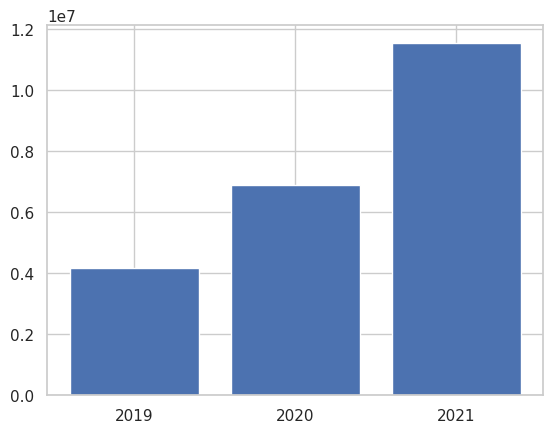

In [ ]:
from matplotlib import pyplot as plt
    
# matplotlib requires a Pandas dataframe, not a Spark one
df_sales = df_spark.toPandas()
# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])
# Display the plot
plt.show()

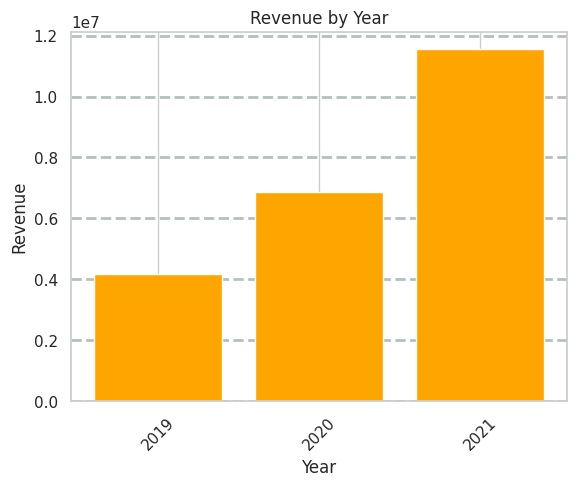

In [ ]:
# Clear the plot area
plt.clf()
# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)
# Show the figure
plt.show()

<Figure size 640x480 with 0 Axes>

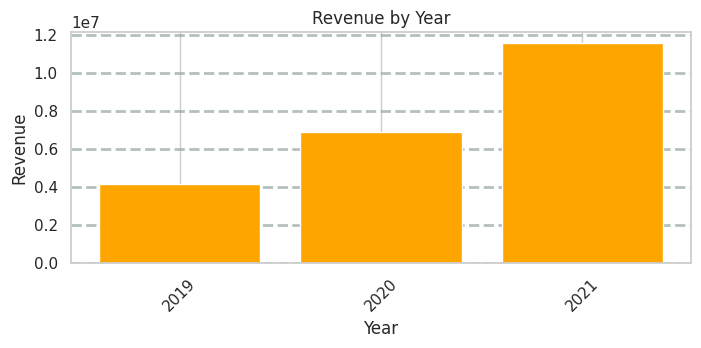

In [ ]:
# Clear the plot area
plt.clf()
# Create a Figure
fig = plt.figure(figsize=(8,3))
# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)
# Show the figure
plt.show()

## Multiple charts

<Figure size 640x480 with 0 Axes>

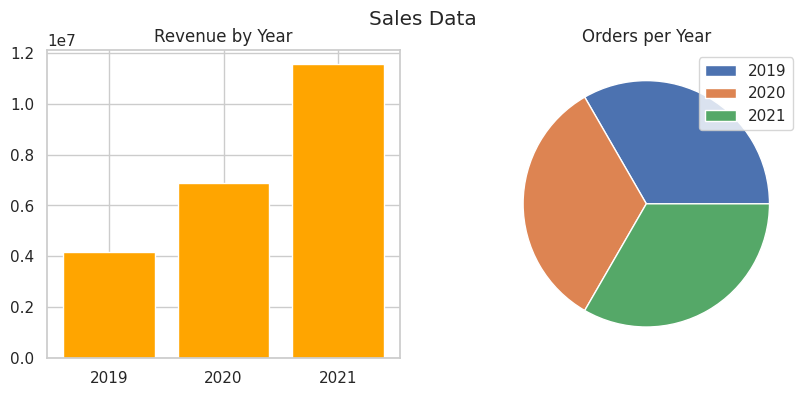

In [ ]:
# Clear the plot area
plt.clf()
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))
# Create a bar plot of revenue by year on the first axis
ax[0].bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
ax[0].set_title('Revenue by Year')
# Create a pie chart of yearly order counts on the second axis
yearly_counts = df_sales['OrderYear'].value_counts()
ax[1].pie(yearly_counts)
ax[1].set_title('Orders per Year')
ax[1].legend(yearly_counts.keys().tolist())
# Add a title to the Figure
fig.suptitle('Sales Data')
# Show the figure
plt.show()

## Testing out Seaborn
> Library makes it simpler to create complex plots of statistical data, and enables you to control the visual theme for consistent data visualizations.

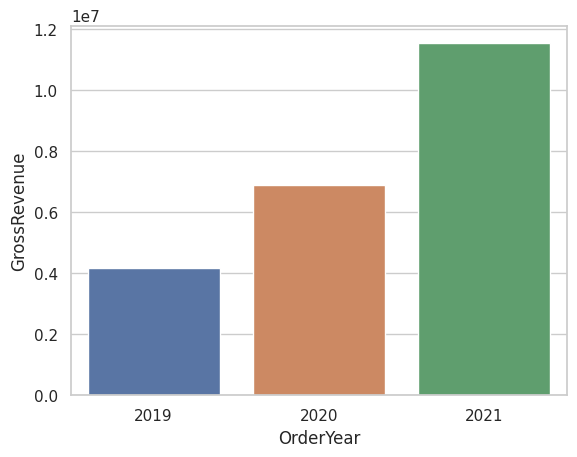

In [ ]:
import seaborn as sns
   
# Clear the plot area
plt.clf()
# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

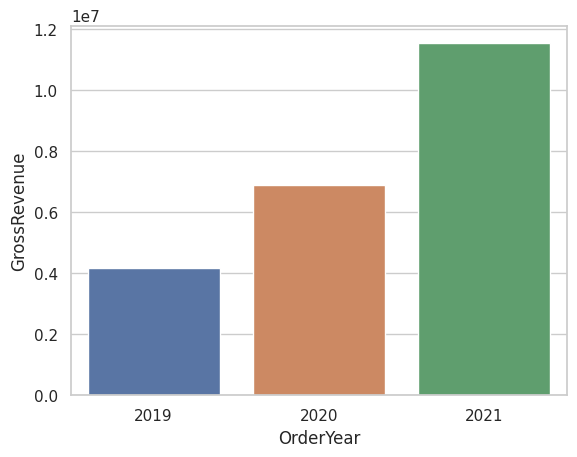

In [ ]:
# Clear the plot area
plt.clf()
   
# Set the visual theme for seaborn
sns.set_theme(style="whitegrid")
   
# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

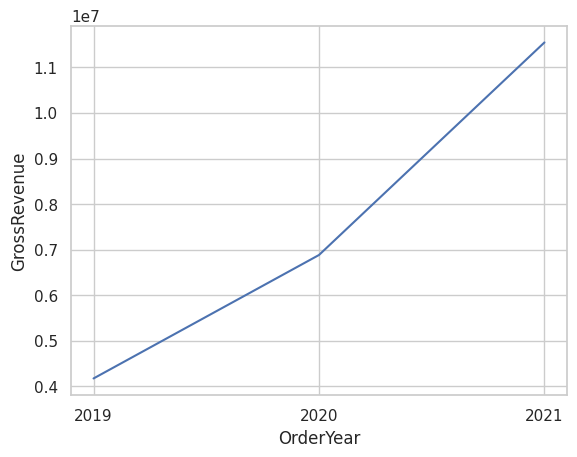

In [ ]:
# Clear the plot area
plt.clf()
   
# Create a bar chart
ax = sns.lineplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

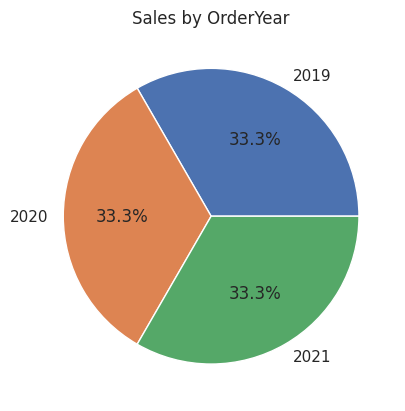

In [ ]:
plt.clf()
# Create a pie chart of another column, for example, 'ProductCategory'
category_counts = df_sales['OrderYear'].value_counts()
plt.pie(category_counts, labels=category_counts.keys(), autopct='%1.1f%%')
plt.title('Sales by OrderYear')
plt.show()

In [ ]:
from pyspark.sql.functions import year, month

# Convert OrderDate to Year and Month for aggregation
df = df.withColumn("OrderYear", year("OrderDate")).withColumn("OrderMonth", month("OrderDate"))

# Aggregate data by OrderYear to get total sales (Quantity * UnitPrice) and total tax
df_yearly_sales = df.groupBy("OrderYear").agg(
    (sum("Quantity") * sum("UnitPrice")).alias("TotalSales"),
    sum("Tax").alias("TotalTax")
)

# Display yearly sales and tax bar chart
display(df_yearly_sales)

# Aggregate data by Item to get total quantity sold
df_item_sales = df.groupBy("Item").agg(
    sum("Quantity").alias("TotalQuantitySold")
)

# Display sales by item as a pie chart
display(df_item_sales)